<a href="https://colab.research.google.com/github/Mercymerine/Pandas-Analysis/blob/main/Sports_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cycle = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
cycle.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [3]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

In [4]:
missing_percentage = (cycle.isnull().sum()/len(cycle)) * 100
print(missing_percentage)

edition           0.000000
start_date        0.000000
winner_name       0.000000
winner_team       0.000000
distance          0.000000
time_overall      7.547170
time_margin       7.547170
stage_wins        0.000000
stages_led        0.000000
height           37.735849
weight           36.792453
age               0.000000
born              0.000000
died             47.169811
full_name        56.603774
nickname         30.188679
birth_town        0.000000
birth_country     0.000000
nationality       0.000000
dtype: float64


In [5]:
delete = ['nickname', 'full_name', 'died']
cycle.drop(columns = delete, inplace = True)

In [6]:
mean_TO = cycle['time_overall'].mean()
cycle['time_overall'].fillna(mean_TO, inplace=True)

In [7]:
mean_TM = cycle['time_margin'].mean()
cycle['time_margin'].fillna(mean_TM, inplace=True)

In [8]:
mean_h = cycle['height'].mean()
cycle['height'].fillna(mean_h, inplace=True)

In [9]:
mean_w = cycle['weight'].mean()
cycle['weight'].fillna(mean_w, inplace=True)

In [10]:
cycle['start_date'] = pd.to_datetime(cycle['start_date'])

In [11]:
cycle.dtypes

edition                   int64
start_date       datetime64[ns]
winner_name              object
winner_team              object
distance                float64
time_overall            float64
time_margin             float64
stage_wins                int64
stages_led                int64
height                  float64
weight                  float64
age                       int64
born                     object
birth_town               object
birth_country            object
nationality              object
dtype: object

The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier

In [12]:
cycle.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.620000,60.000000,32,1871-03-03,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,1.778788,69.253731,19,1884-08-04,Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,125.754983,0.267727,5,10,1.778788,69.253731,24,1881-06-29,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,125.754983,0.267727,5,12,1.778788,69.253731,27,1879-06-05,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,125.754983,0.267727,2,5,1.778788,69.253731,24,1882-10-18,Plessé,France,France


In [13]:
cycle.describe()

,edition,start_date,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age
count,106.000000,106,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,1964-05-12 18:20:22.641509440,4212.064151,125.754983,0.267727,2.735849,10.792453,1.778788,69.253731,27.716981
min,1.000000,1903-07-01 00:00:00,2428.000000,82.086667,0.002222,0.000000,1.000000,1.610000,52.000000,19.000000
25%,27.250000,1933-09-27 18:00:00,3657.875000,93.260556,0.050833,1.000000,6.250000,1.762500,68.000000,26.000000
50%,53.500000,1966-12-24 12:00:00,4155.500000,116.327917,0.118611,2.000000,12.000000,1.778788,69.253731,28.000000
75%,79.750000,1993-04-03 00:00:00,4652.500000,141.062847,0.267727,4.000000,14.000000,1.780000,70.750000,30.000000
max,106.000000,2019-07-06 00:00:00,5745.000000,238.740278,2.989167,8.000000,22.000000,1.900000,88.000000,36.000000
std,30.743563,NaN,704.284160,39.944813,0.457694,1.842885,5.307169,0.044839,5.226933,3.354470


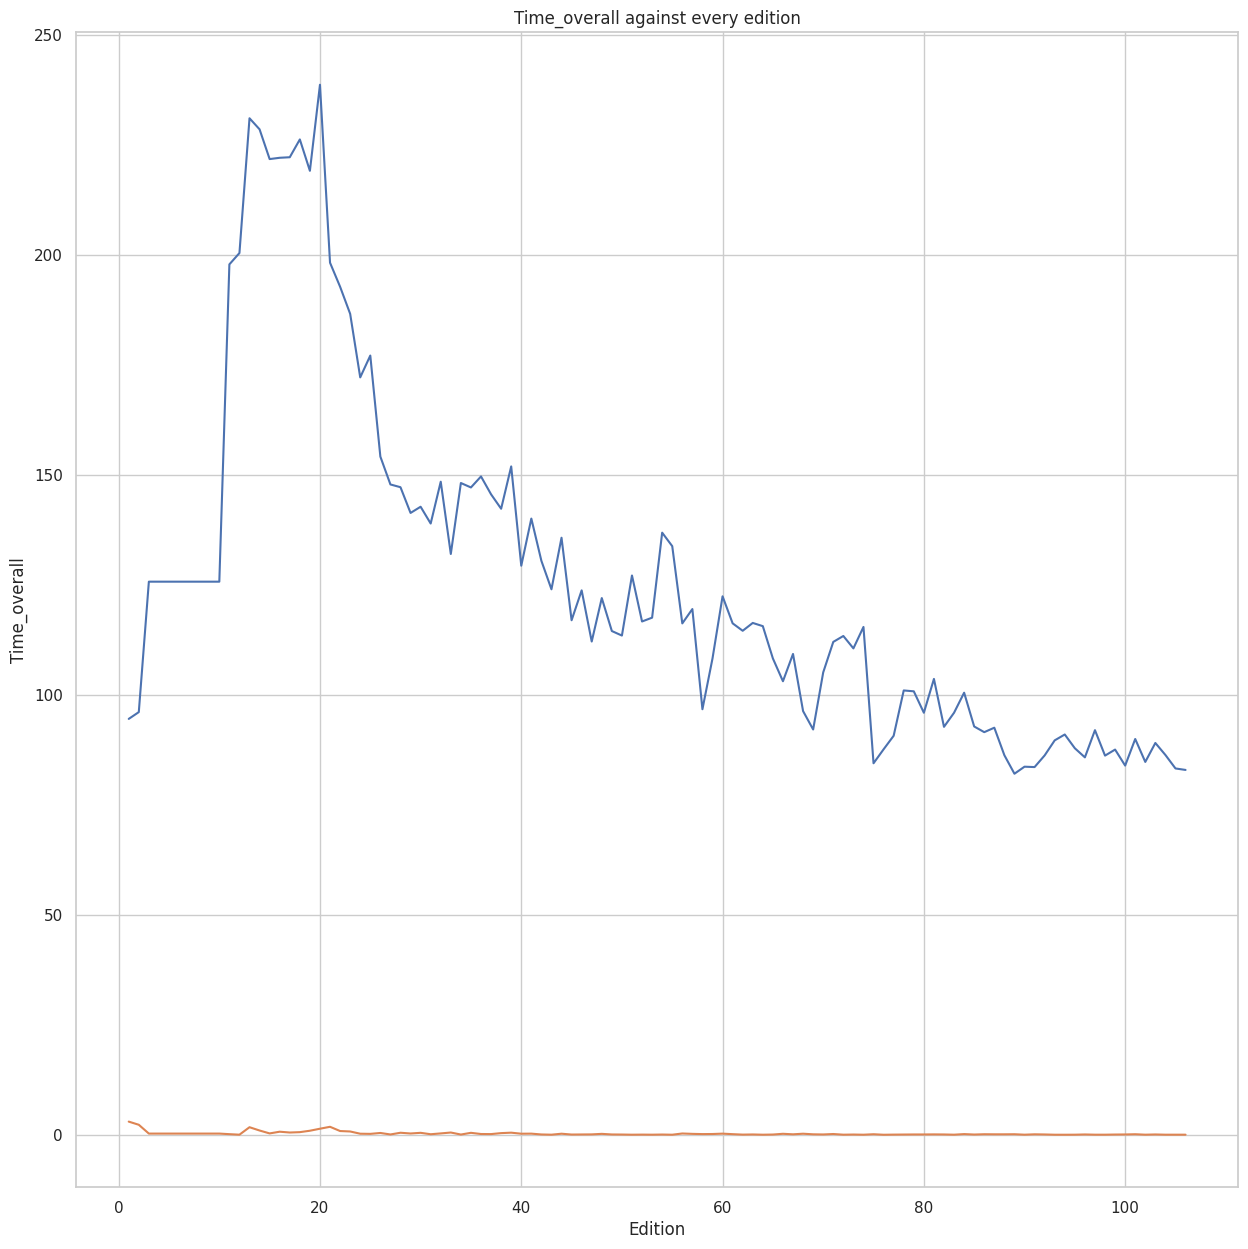

In [28]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=cycle, y='time_overall', x='edition')
sns.lineplot(data=cycle, y='time_margin', x='edition')

plt.title('Time_overall against every edition')
plt.ylabel('Time_overall')
plt.xlabel('Edition')
plt.show()

The bikes are getting better as years go by hence less time


A box plot of the winners per stage type and comment sth. Use this image as inspiration

In [15]:
cycle.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.620000,60.000000,32,1871-03-03,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,1.778788,69.253731,19,1884-08-04,Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,125.754983,0.267727,5,10,1.778788,69.253731,24,1881-06-29,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,125.754983,0.267727,5,12,1.778788,69.253731,27,1879-06-05,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,125.754983,0.267727,2,5,1.778788,69.253731,24,1882-10-18,Plessé,France,France


In [16]:
cycle['stage_wins'].nunique()

9

In [17]:
cycle['stages_led'].nunique()

22

<Figure size 1500x1500 with 0 Axes>

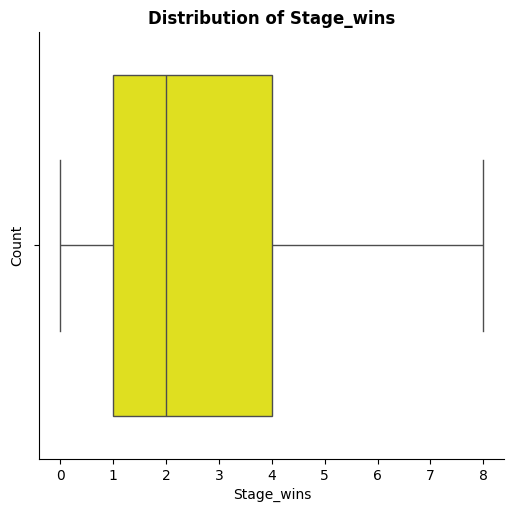

In [18]:
plt.figure(figsize=(15, 15))
sns.catplot(cycle['stage_wins'], kind='box', orient='h', color='yellow')
plt.xlabel('Stage_wins')
plt.ylabel('Count')
plt.title('Distribution of Stage_wins', fontweight='bold')
plt.show()


In [19]:
cycle['winner_name'].nunique()

63

In [20]:
cycle['winner_name'].value_counts()

winner_name
Lance Armstrong        7
Miguel Induráin        5
Bernard Hinault        5
Eddy Merckx            5
Jacques Anquetil       5
                      ..
Federico Bahamontes    1
Gastone Nencini        1
Felice Gimondi         1
Lucien Aimar           1
Egan Bernal            1
Name: count, Length: 63, dtype: int64

What relationship is there between a winners age and the number of stages led.

In [21]:
cycle.columns

Index(['edition', 'start_date', 'winner_name', 'winner_team', 'distance',
       'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height',
       'weight', 'age', 'born', 'birth_town', 'birth_country', 'nationality'],
      dtype='object')

In [22]:
cycle_age= cycle.sort_values(by='age', ascending=False)
cycle_age.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,birth_town,birth_country,nationality
15,16,1922-06-25,Firmin Lambot,Peugeot–Wolber,5375.0,222.135000,0.694722,0,3,1.778788,69.253731,36,1886-03-14,Florennes,Belgium,Belgium
16,17,1923-06-24,Henri Pélissier,Automoto–Hutchinson,5386.0,222.258333,0.508333,3,6,1.778788,69.253731,34,1889-01-22,Paris,France,France
97,98,2011-07-02,Cadel Evans,BMC Racing Team,3430.0,86.206111,0.016944,1,2,1.740000,64.000000,34,1977-02-14,Katherine,Australia,Australia
34,35,1948-06-30,Gino Bartali,Italy,4922.0,147.176667,0.440556,7,9,1.720000,66.000000,33,1914-07-18,Ponte e Ema,Italy,Italy
14,15,1921-06-26,Léon Scieur,La Sportive,5485.0,221.840556,0.305000,2,14,1.778788,69.253731,33,1888-03-18,Florennes,Belgium,Belgium


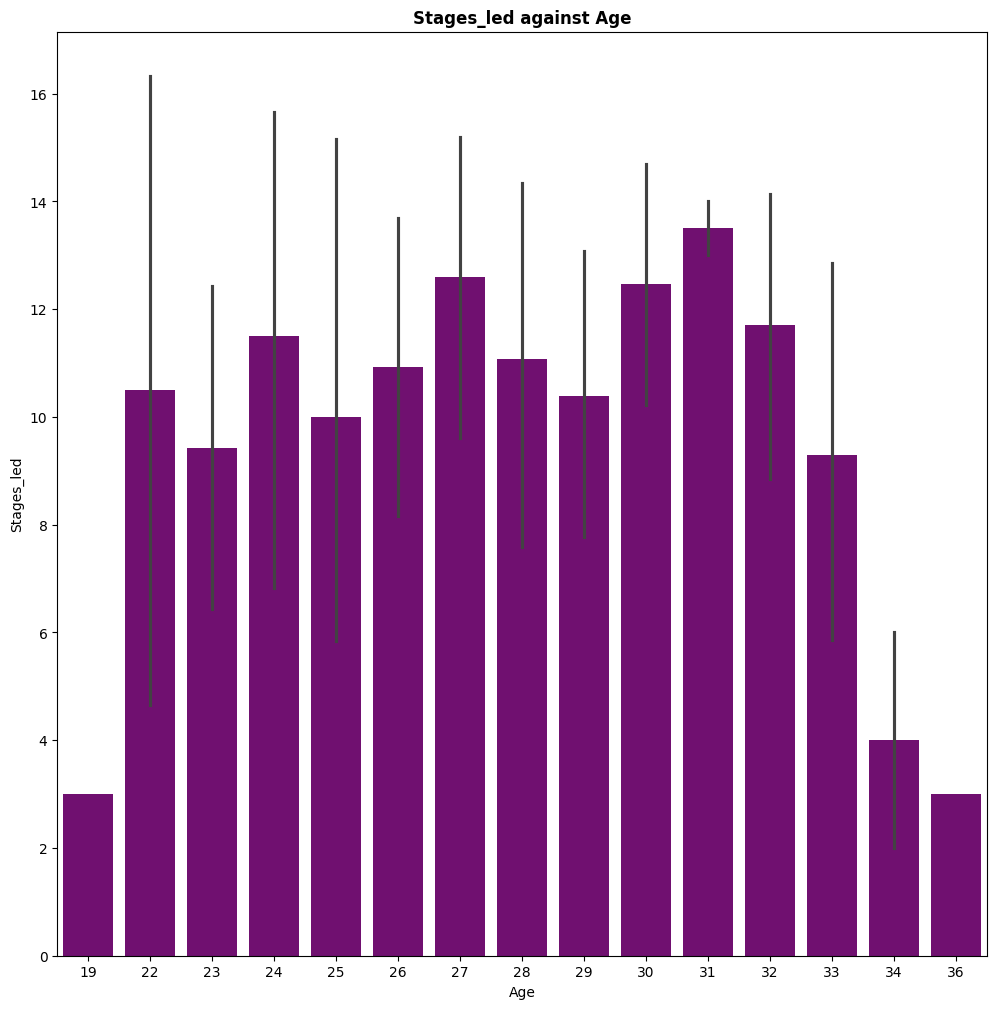

In [23]:
plt.figure(figsize=(12, 12))
sns.barplot(data=cycle_age, x='age', y='stages_led', color='purple')
plt.xlabel('Age')
plt.ylabel('Stages_led')
plt.title('Stages_led against Age', fontweight='bold')
plt.show()

There`s no correlation

Sort by the most recent winning and find the winner's nationality and display the top. Use this image as inspiration

In [24]:
cycle['year'] = cycle['start_date'].dt.year
cycle.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,birth_town,birth_country,nationality,year
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.620000,60.000000,32,1871-03-03,Arvier,Italy,France,1903
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,1.778788,69.253731,19,1884-08-04,Desvres,France,France,1904
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,125.754983,0.267727,5,10,1.778788,69.253731,24,1881-06-29,Paris,France,France,1905
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,125.754983,0.267727,5,12,1.778788,69.253731,27,1879-06-05,Moret-sur-Loing,France,France,1906
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,125.754983,0.267727,2,5,1.778788,69.253731,24,1882-10-18,Plessé,France,France,1907


In [25]:
cycle_sorted = cycle.sort_values(by='year', ascending=False)
cycle.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,birth_town,birth_country,nationality,year
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.620000,60.000000,32,1871-03-03,Arvier,Italy,France,1903
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,1.778788,69.253731,19,1884-08-04,Desvres,France,France,1904
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,125.754983,0.267727,5,10,1.778788,69.253731,24,1881-06-29,Paris,France,France,1905
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,125.754983,0.267727,5,12,1.778788,69.253731,27,1879-06-05,Moret-sur-Loing,France,France,1906
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,125.754983,0.267727,2,5,1.778788,69.253731,24,1882-10-18,Plessé,France,France,1907


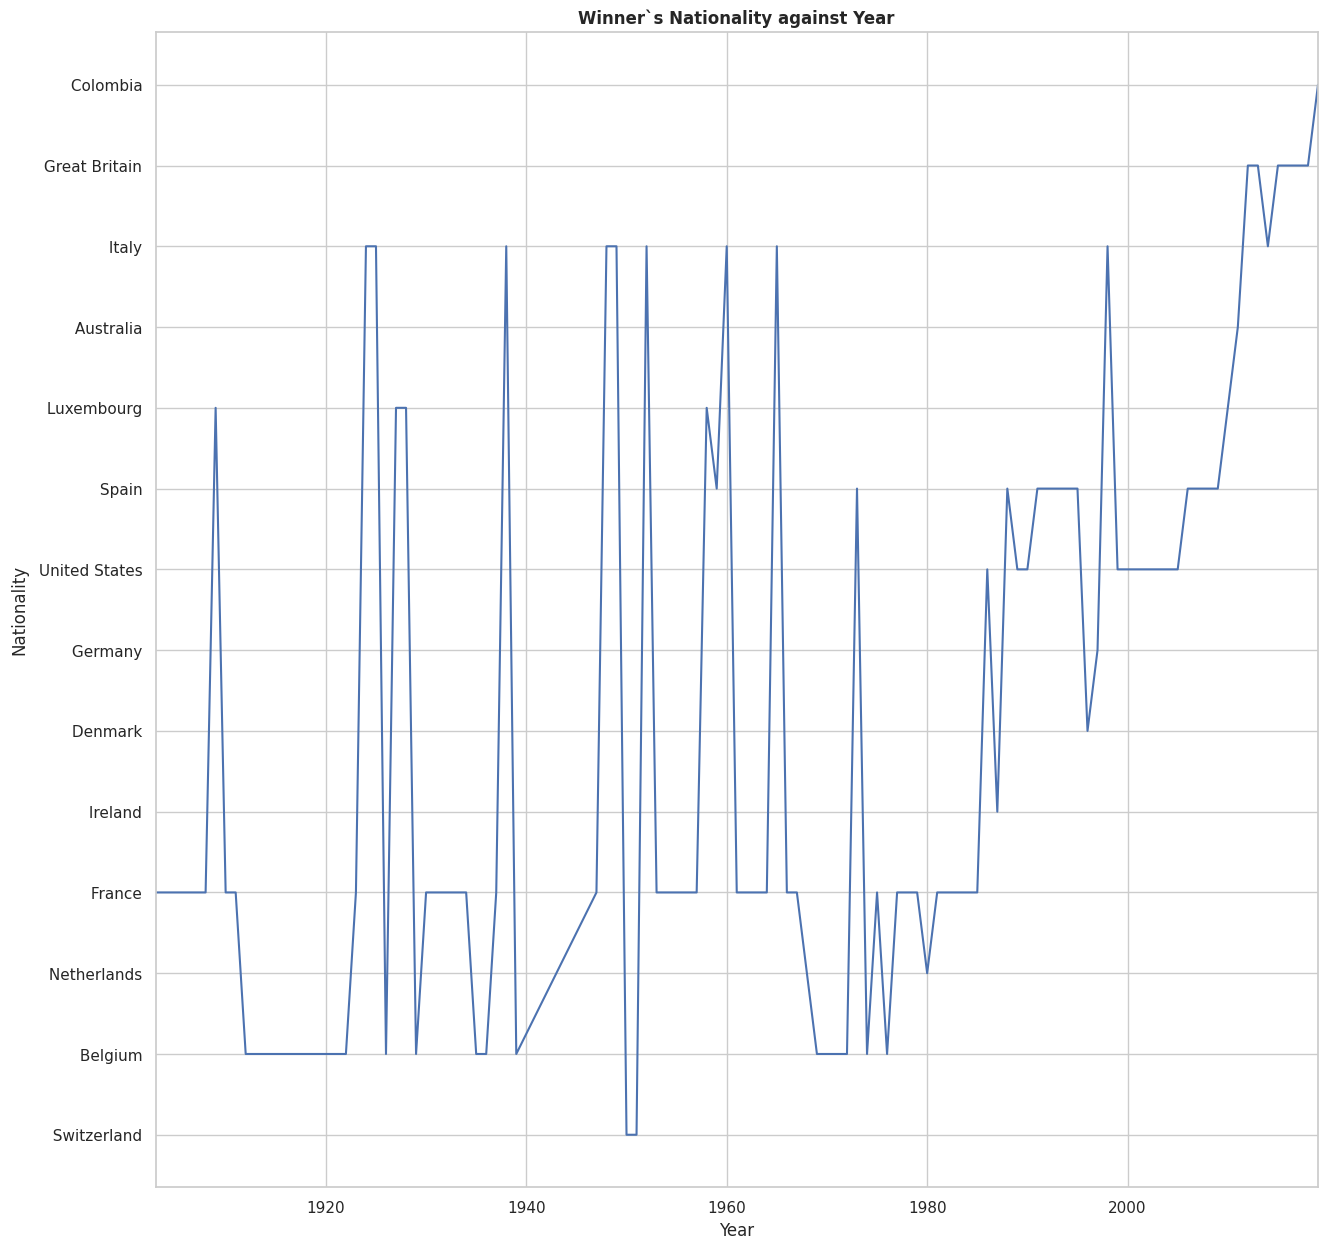

In [26]:
plt.figure(figsize=(15, 15))
sns.set_theme(style ='whitegrid')
sns.lineplot(cycle_sorted, x='year', y='nationality')
plt.xlim(1903, 2019)
plt.xlabel('Year')
plt.ylabel('Nationality')
plt.title('Winner`s Nationality against Year', fontweight='bold')
plt.show()
